# Project 3: Poisonous mushrooms

In this project, you'll investigate properties of mushrooms. This classic dataset contains over 8000 observations, where each mushroom is described by a variety of features like color, odor, etc., and the target variable is an indicator for whether the mushroom is poisonous. Since all the observations are categorical, I've binarized the feature space. Look at the feature_names below to see all 126 binary names.

You'll start by running PCA to reduce the dimensionality from 126 down to 2 so that you can easily visualize the data. In general, PCA is very useful for visualization (though sklearn.manifold.tsne is known to produce better visualizations). Recall that PCA is a linear transformation. The 1st projected dimension is the linear combination of all 126 original features that captures as much of the variance in the data as possible. The 2nd projected dimension is the linear combination of all 126 original features that captures as much of the remaining variance as possible. The idea of dense low dimensional representations is crucial to machine learning!

Once you've projected the data to 2 dimensions, you'll experiment with clustering using KMeans and density estimation with Gaussian Mixture Models. Finally, you'll train a classifier by fitting a GMM for the positive class and a GMM for the negative class, and perform inference by comparing the probabilities output by each model.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but please prepare your own write-up and write your own code.

In [4]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.mixture import GMM
from matplotlib.colors import LogNorm

Load feature names.

In [5]:
feature_names = []
with open(r'C:/users/nivelaga/Documents/Berkeley_Mids_Homework/W207/207-Applied-Machine-Learning/Data/mushroom.map') as fmap:
    for line in fmap:
        [index, name, junk] = line.split()
        feature_names.append(name)

print 'Loaded feature names:', len(feature_names)

Loaded feature names: 126


Load data. The data is sparse in the input file, but there aren't too many features, so we'll use a dense representation, which is supported by all sklearn objects.

In [6]:
X, Y = [], []

with open('C:/users/nivelaga/Documents/Berkeley_Mids_Homework/W207/207-Applied-Machine-Learning/Data/mushroom.data') as fdata:
    for line in fdata:
        items = line.split()
        Y.append(int(items.pop(0)))
        x = np.zeros(len(feature_names))
        for item in items:
            feature = int(item.split(':')[0])
            x[feature] = 1
        X.append(x)

# Convert these lists to numpy arrays.
X = np.array(X)
Y = np.array(Y)

# Split into train and test data.
train_data, train_labels = X[:7000], Y[:7000]
test_data, test_labels = X[7000:], Y[7000:]

# Check that the shapes look right.
print train_data.shape, test_data.shape

(7000L, 126L) (1124L, 126L)


(1) Run Principal Components Analysis on the data. Show what fraction of the total variance in the training data is explained by the first k principal components, for k in [1, 50].

In [128]:
import pandas as pd

def P1():
### STUDENT START ###
    Variances = pd.Series(index = range(1,51))
    #iterate over possible PCA components
    for k in range(1,51):
        PCA_Model = PCA(n_components=k)
        Transformed_train = PCA_Model.fit_transform(train_data)
        #sum explained variance by component for total explained variance
        Variances.loc[k] = np.sum(PCA_Model.explained_variance_ratio_)
    return Variances
### STUDENT END ###

P1()

1     0.164043
2     0.297278
3     0.399013
4     0.469646
5     0.508313
6     0.545121
7     0.576403
8     0.603740
9     0.629905
10    0.652215
11    0.672695
12    0.691379
13    0.708607
14    0.725523
15    0.740642
16    0.755731
17    0.770005
18    0.784194
19    0.797436
20    0.808892
21    0.819465
22    0.830263
23    0.840669
24    0.850599
25    0.859616
26    0.868368
27    0.876313
28    0.883899
29    0.891425
30    0.898456
31    0.904908
32    0.911020
33    0.916715
34    0.922086
35    0.927335
36    0.932400
37    0.937431
38    0.941997
39    0.946515
40    0.950915
41    0.955115
42    0.959098
43    0.962800
44    0.966396
45    0.969773
46    0.972767
47    0.975487
48    0.977844
49    0.980058
50    0.982103
dtype: float64

(2) PCA can be very useful for visualizing data. Project the training data down to 2 dimensions and plot it. Show the positive (poisonous) cases in blue and the negative (non-poisonous) in red. Here's a reference for plotting: http://matplotlib.org/users/pyplot_tutorial.html

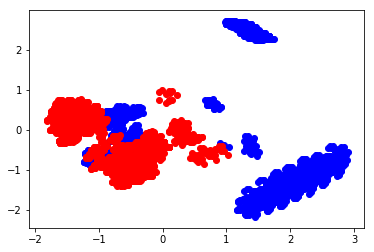

In [8]:
def P2():
### STUDENT START ###
    #transform data
    PCA_Model = PCA(n_components=2)
    Transformed_train = PCA_Model.fit_transform(train_data)
    Transformed_train = pd.DataFrame(Transformed_train)
    Transformed_train['Label'] = train_labels
    
    #plot positives as blue, negatives as red in 2d vector space
    plt.scatter(Transformed_train.loc[Transformed_train.Label == 1, 0], Transformed_train.loc[Transformed_train.Label == 1, 1], c='blue')
    plt.scatter(Transformed_train.loc[Transformed_train.Label == 0, 0], Transformed_train.loc[Transformed_train.Label == 0, 1], c='red')
### STUDENT END ###

P2()

(3) Run KMeans with [1,16] clusters over the 2d projected data. Mark each centroid cluster and plot a circle that goes through the most distant point assigned to each cluster.

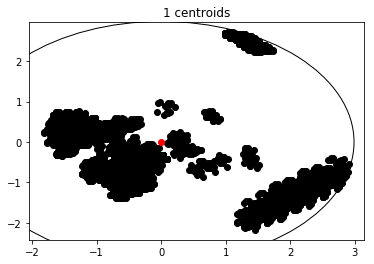

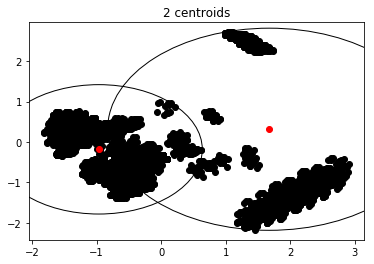

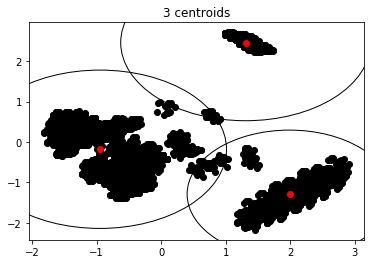

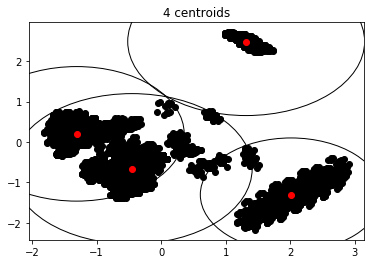

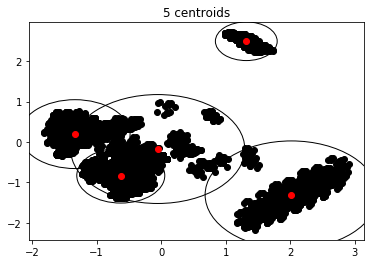

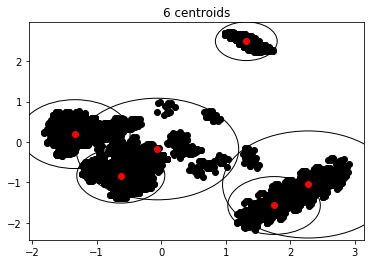

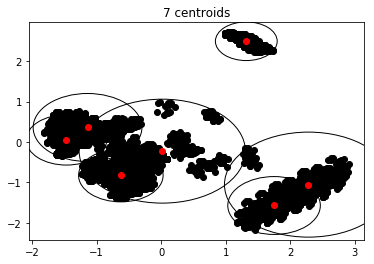

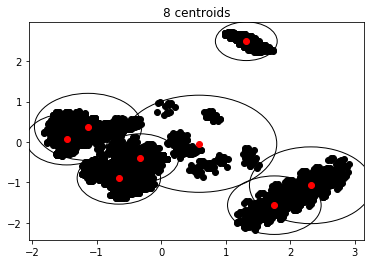

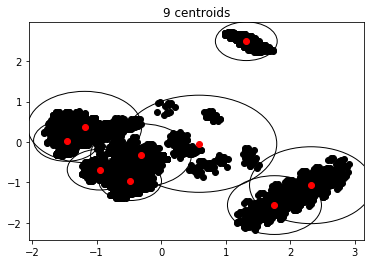

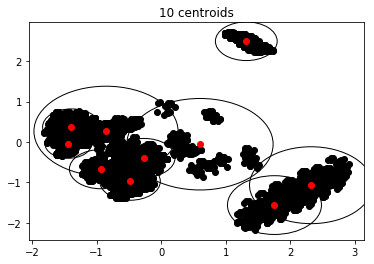

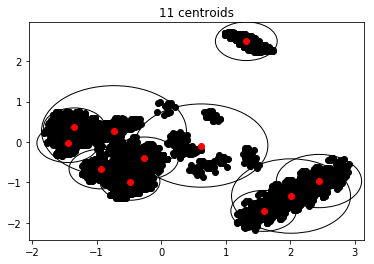

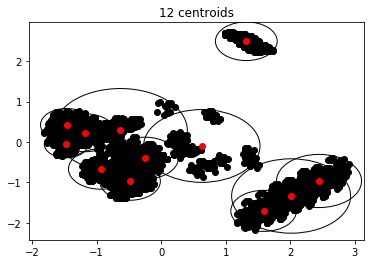

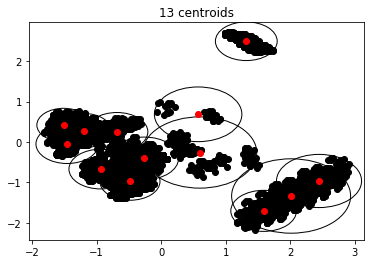

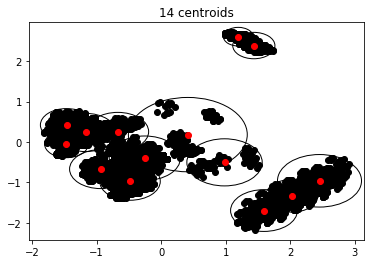

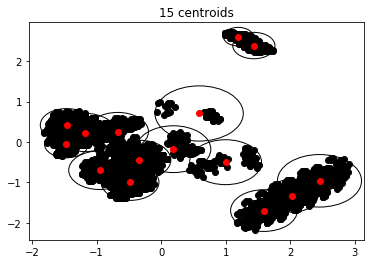

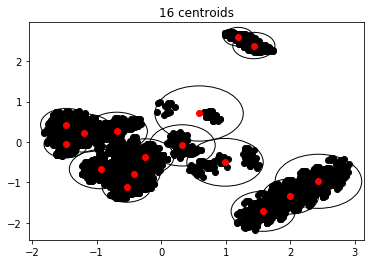

In [129]:
def P3():
### STUDENT START ###
    PCA_Model = PCA(n_components=2)
    Transformed_train = PCA_Model.fit_transform(train_data)
    Transformed_train = pd.DataFrame(Transformed_train)
    Transformed_train.columns = ['x_point','y_point']
    Transformed_train['Label'] = train_labels
    
    #iterate over cluster number
    for i in range(1,17):
        Kmeans = KMeans(n_clusters = i)
        clusterassignments = Kmeans.fit_predict(Transformed_train[['x_point','y_point']])
        Centroids = Kmeans.cluster_centers_

        CentroidDF = pd.DataFrame(Centroids).reset_index()
        CentroidDF.columns = ['Cluster','x_cent','y_cent']
        Transformed_train['Cluster'] = clusterassignments
        Transformed_train.columns = ['x_point','y_point','Label','Cluster']

        MergeFrame = pd.merge(Transformed_train,CentroidDF,on='Cluster')
        MergeFrame['EucDist'] = np.sqrt(np.square(MergeFrame.x_cent - MergeFrame.x_point) + np.square(MergeFrame.y_cent - MergeFrame.y_point))

        counter = 0

        fig, ax = plt.subplots()

        ax = plt.gca()
        ax.cla()
        ax.set_title(str(i) + ' centroids')
        #plot datapoints as black
        ax.plot(Transformed_train.x_point, Transformed_train.y_point, 'o', color='black')
        
        #plot each centroid plus radius to furthest point
        for radius in MergeFrame.groupby('Cluster').max()['EucDist']:
            ax.plot(CentroidDF.iloc[counter]['x_cent'], CentroidDF.iloc[counter]['y_cent'], 'o', color='red')
            circle = plt.Circle((CentroidDF.iloc[counter]['x_cent'], CentroidDF.iloc[counter]['y_cent']), radius,fill=False)
            ax.add_artist(circle)
            counter+=1

### STUDENT END ###

P3()

(4) Fit a Gaussian Mixture Model for the positive examples in your 2d projected data. Plot the estimated density contours as shown here: http://scikit-learn.org/stable/auto_examples/mixture/plot_gmm_pdf.html#example-mixture-plot-gmm-pdf-py. Vary the number of mixture components from 1-4 and the covariance matrix type ('spherical', 'diag', 'tied', 'full').

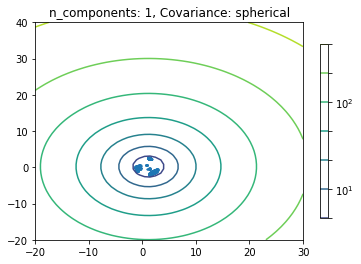

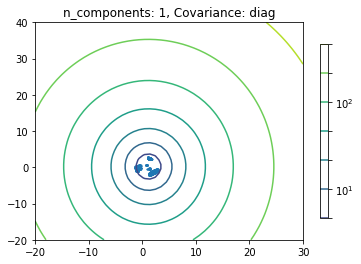

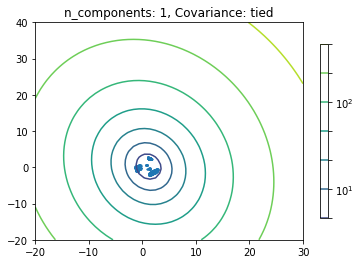

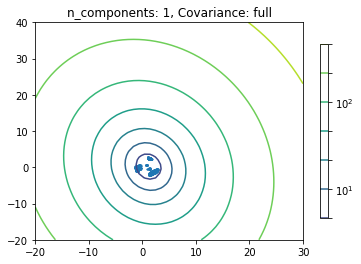

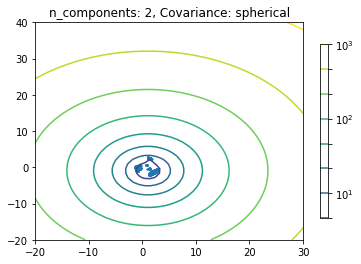

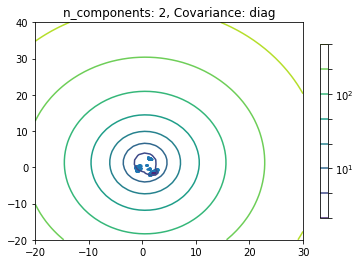

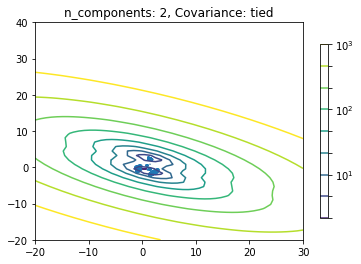

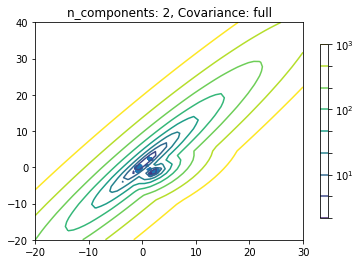

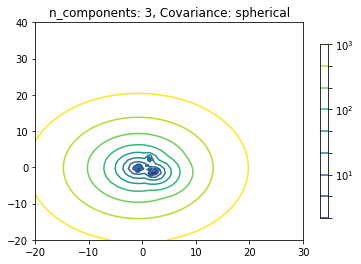

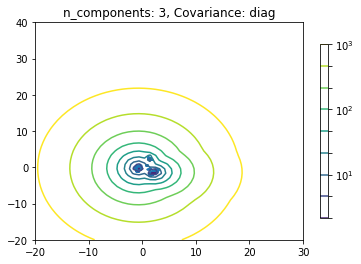

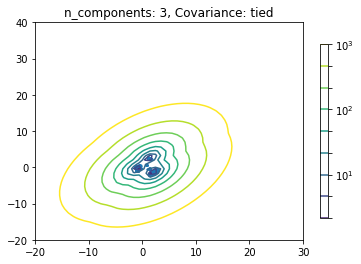

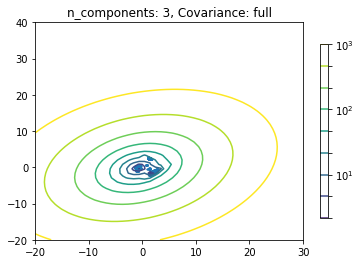

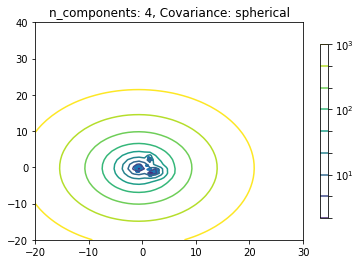

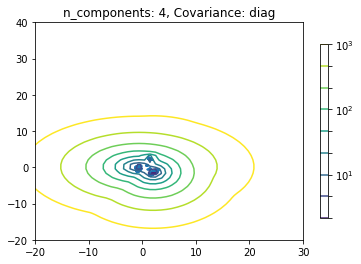

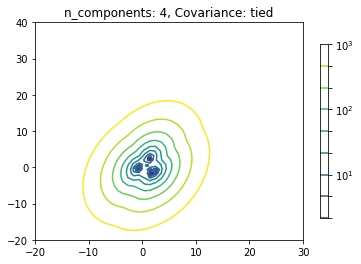

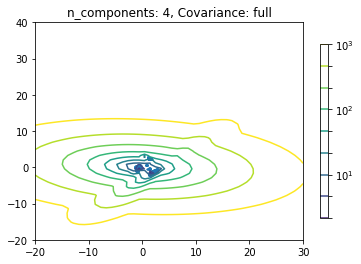

In [52]:
def P4():
### STUDENT START ###
    from matplotlib.colors import LogNorm
    from sklearn import mixture
    #transform data
    PCA_Model = PCA(n_components=2)
    Transformed_train = PCA_Model.fit_transform(train_data)
    Transformed_train = pd.DataFrame(Transformed_train)
    Transformed_train.columns = ['x_point','y_point']
    Transformed_train['Label'] = train_labels
    Positives = Transformed_train[Transformed_train.Label == 1]
    
    for i in range(1,5):
        for j in ['spherical', 'diag', 'tied', 'full']:
            #code taken from provided example: http://scikit-learn.org/stable/auto_examples/mixture/plot_gmm_pdf.html#example-mixture-plot-gmm-pdf-py
            clf = mixture.GaussianMixture(n_components=i, covariance_type=j)
            # display predicted scores by the model as a contour plot

            clf.fit(np.array(Positives[['x_point','y_point']]))

            x = np.linspace(-20, 30)
            y = np.linspace(-20, 40)
            X, Y = np.meshgrid(x, y)
            XX = np.array([X.ravel(), Y.ravel()]).T
            Z = -clf.score_samples(XX)
            Z = Z.reshape(X.shape)
            #Z = np.array([[x for x in clf.score_samples(XX)[0]], [x for x in clf.score_samples(XX)[1]]]) * -1
            #Z = Z.reshape(X.shape)

            CS = plt.contour(X, Y, Z, norm=LogNorm(vmin=1.0, vmax=1000.0),
                             levels=np.logspace(0, 3, 10))
            CB = plt.colorbar(CS, shrink=0.8, extend='both')
            plt.scatter(Positives['x_point'], Positives['y_point'], .8)

            plt.title('n_components: ' + str(i) + ', Covariance: ' + str(j))
            plt.axis('tight')
            plt.show()
### STUDENT END ###

P4()

(5) Fit two 4-component full covariance GMMs, one for the positive examples and one for the negative examples in your 2d projected data. Predict the test examples by choosing the label for which the model gives a larger probability (use GMM.score). What is the accuracy?

In [126]:
def P5():
### STUDENT START ###
    from sklearn import mixture
    #Transform traning data into two components and train PCA model
    PCA_Model = PCA(n_components=2)
    Transformed_train = PCA_Model.fit_transform(train_data)
    Transformed_train = pd.DataFrame(Transformed_train)
    Transformed_train.columns = ['x_point','y_point']
    Transformed_train['Label'] = train_labels
    
    #transform test data using trained PCA model
    Transformed_test = pd.DataFrame(PCA_Model.transform(test_data))
    Transformed_test.columns = ['x_point','y_point']
    Transformed_test['Label'] = test_labels

    Positives = Transformed_train[Transformed_train.Label == 1]
    Negatives = Transformed_train[Transformed_train.Label == 0]
    
    #train two GMM models
    negCLF = mixture.GaussianMixture(n_components=4, covariance_type='full')
    posCLF = mixture.GaussianMixture(n_components=4, covariance_type='full')
    
    negCLF.fit(Negatives[['x_point','y_point']])
    posCLF.fit(Positives[['x_point','y_point']])
    
    #calculate scores for each models, using score_samples because it seems more appropriate than .score
    Transformed_test['log_neg'] = negCLF.score_samples(Transformed_test[['x_point','y_point']]) 
    Transformed_test['log_pos'] = posCLF.score_samples(Transformed_test[['x_point','y_point']]) 

    #calculate whichever probability is larger
    Transformed_test['prediction'] = (Transformed_test['log_pos'] > Transformed_test['log_neg']).astype(int)

    from sklearn.metrics import accuracy_score
    return accuracy_score(Transformed_test.Label,Transformed_test.prediction)
### STUDENT END ###
    
print(P5())

0.9377224199288257


ANSWER: We observe an accuracy of 93.8%.

(6) Ideally, we'd like a model that gives the best accuracy with the fewest parameters. Run a series of experiments to find the model that gives the best accuracy with no more than 50 parameters. For example, with 3 PCA components and 2-component diagonal covariance GMMs, you'd have:

( (3 mean vector + 3 covariance matrix) x 2 components ) x 2 classes = 24 parameters

You should vary the number of PCA components, the number of GMM components, and the covariance type.

In [130]:
def P6():
    PCA_Components = range(2,4)
    GMM_Components = range(2,5)
    Covariances = ['spherical', 'diag', 'tied', 'full']

    resultDF = pd.DataFrame(columns = ['Accuracy'], index=pd.MultiIndex.from_product([PCA_Components,GMM_Components,Covariances],names=['PCA','GMM','Covariance']))

### STUDENT START ###
    #maximum PCA components: 3
    for i in PCA_Components:
        PCA_Model = PCA(n_components=i)
        Transformed_train = PCA_Model.fit_transform(train_data)
        Transformed_train = pd.DataFrame(Transformed_train)
        Transformed_train['Label'] = train_labels

        Transformed_test = pd.DataFrame(PCA_Model.transform(test_data))
        Transformed_test['Label'] = test_labels

        #max GMM components: 4
        for j in GMM_Components:
            for k in Covariances:
                negCLF = mixture.GaussianMixture(n_components=j, covariance_type=k)
                posCLF = mixture.GaussianMixture(n_components=j, covariance_type=k)

                negCLF.fit(Transformed_train.loc[Transformed_train.Label == 0,Transformed_train.columns != 'Label'])
                posCLF.fit(Transformed_train.loc[Transformed_train.Label == 1,Transformed_train.columns != 'Label'])
                
                test_with_score = Transformed_test.copy(deep=True)
                test_with_score['log_neg'] = negCLF.score_samples(test_with_score.loc[:,test_with_score.columns != 'Label']) 
                test_with_score['log_pos'] = posCLF.score_samples(test_with_score.loc[:,(test_with_score.columns != 'Label') & (test_with_score.columns != 'log_neg')]) 

                test_with_score['prediction'] = (test_with_score['log_pos'] > test_with_score['log_neg']).astype(int)
                
                resultDF.loc[(i,j,k)] = accuracy_score(test_with_score.Label,test_with_score.prediction)
    return resultDF
    #Max dimensions = 3 X 4 X 2 X 2 = 48
### STUDENT END ###

results = P6()
print(results)
print("Best results are as follows: ")
print(results[results.Accuracy == np.max(results.Accuracy)])

                    Accuracy
PCA GMM Covariance          
2   2   spherical   0.876335
        diag        0.872776
        tied         0.88968
        full        0.909253
    3   spherical    0.94573
        diag        0.935943
        tied         0.94484
        full        0.930605
    4   spherical    0.94573
        diag        0.939502
        tied         0.94484
        full        0.936833
3   2   spherical   0.891459
        diag        0.859431
        tied        0.854982
        full        0.818505
    3   spherical   0.906584
        diag        0.913701
        tied        0.923488
        full        0.909253
    4   spherical   0.956406
        diag        0.949288
        tied        0.937722
        full        0.909253
Best results are as follows: 
                    Accuracy
PCA GMM Covariance          
3   4   spherical   0.956406


ANSWER: We observe the best accuracy with 3 principal components, 4 GMM components, and spherical covariance. We can't be confident that this is the best accuracy possible: as it uses the maximum allowable PCA and GMM components defined in these iterations (could continue to increase). However, with the limitation of 50 parameters, this is a reasonable stopping point.